# Project Part 1

### 1

In [1]:
# Importing needed packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from scipy.stats import f
from scipy import stats
import seaborn as sns

'''
Considering the following column description
  1. inlf                     =1 if in labor force, 1975
  2. hours                    hours worked, 1975
  3. kidslt6                  # kids < 6 years
  4. kidsgt6                  # kids 6-18
  5. age                      woman's age in yrs
  6. educ                     years of schooling
  7. wage                     estimated wage from earns., hours
  8. repwage                  reported wage at interview in 1976
  9. hushrs                   hours worked by husband, 1975
 10. husage                   husband's age
 11. huseduc                  husband's years of schooling
 12. huswage                  husband's hourly wage, 1975
 13. faminc                   family income, 1975
 14. mtr                      fed. marginal tax rate facing woman
 15. motheduc                 mother's years of schooling
 16. fatheduc                 father's years of schooling
 17. unem                     unem. rate in county of resid.
 18. city                     =1 if live in SMSA
 19. exper                    actual labor mkt exper
 20. nwifeinc                 (faminc - wage*hours)/1000
 21. lwage                    log(wage)
 22. expersq                  exper^2
'''
def cleaning(x):
    if x == ".":
        return -1
    else:
        return x

# Writing it into an array
columns = ["inlf", "hours", "kidslt6", "kidsgt6", "age", "educ", "wage", "repwage", "hushrs", "husage", "huseduc", "huswage", "faminc", "mtr", "motheduc", "fatheduc", "unem", "city", "exper", "nwifeinc", "lwage", "expersq"]

# Data is not well formated on txt, reading line by line and formatting it
file = open("MROZ.txt", mode="r")
data = []
for line in  file.readlines():
    current = line.split(" ")
    while("" in current) : 
        current.remove("")
    current.remove("\n")
    current = list(map(cleaning,current))
    #print(current)
    data.append(list(map(float, current)))
data = np.asarray(data)

# Creating the dataframe
data = pd.DataFrame(data, columns=columns)

# Removing entries that do not contain a strictly positive wage
# On the cleaning part, it was assigned the -1 value to the NaN entries in wage and logwage
data = data[data['wage'] > 0]  

# Visualizing the dataset
data

,inlf,hours,kidslt6,kidsgt6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1.0,1610.0,1.0,0.0,32.0,12.0,3.3540,2.65,2708.0,34.0,...,16310.0,0.7215,12.0,7.0,5.0,0.0,14.0,10.910060,1.210154,196.0
1,1.0,1656.0,0.0,2.0,30.0,12.0,1.3889,2.65,2310.0,30.0,...,21800.0,0.6615,7.0,7.0,11.0,1.0,5.0,19.499980,0.328512,25.0
2,1.0,1980.0,1.0,3.0,35.0,12.0,4.5455,4.04,3072.0,40.0,...,21040.0,0.6915,12.0,7.0,5.0,0.0,15.0,12.039910,1.514138,225.0
3,1.0,456.0,0.0,3.0,34.0,12.0,1.0965,3.25,1920.0,53.0,...,7300.0,0.7815,7.0,7.0,5.0,0.0,6.0,6.799996,0.092123,36.0
4,1.0,1568.0,1.0,2.0,31.0,14.0,4.5918,3.60,2000.0,32.0,...,27300.0,0.6215,12.0,14.0,9.5,1.0,7.0,20.100060,1.524272,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1.0,680.0,0.0,5.0,36.0,10.0,2.3118,0.00,3430.0,43.0,...,19772.0,0.7215,7.0,7.0,7.5,0.0,2.0,18.199980,0.838027,4.0
424,1.0,2450.0,0.0,1.0,40.0,12.0,5.3061,6.50,2008.0,40.0,...,35641.0,0.6215,7.0,7.0,5.0,1.0,21.0,22.641060,1.668857,441.0
425,1.0,2144.0,0.0,2.0,43.0,13.0,5.8675,0.00,2140.0,43.0,...,34220.0,0.5815,7.0,7.0,7.5,1.0,22.0,21.640080,1.769429,484.0
426,1.0,1760.0,0.0,1.0,33.0,12.0,3.4091,3.21,3380.0,34.0,...,30000.0,0.5815,12.0,16.0,11.0,1.0,14.0,23.999980,1.226448,196.0


### 2

In [2]:
# Descriptive statistics of the data for all the females
data[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


In [3]:
'''Now for the females such that the husband salary is greater
than the median of the set
'''
wage_median = float(data[["huswage"]].median(axis=0))
husband_superior = data[data['huswage'] > wage_median]
husband_superior[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,4.896822,42.275701,13.242991
std,4.041606,7.388843,2.359045
min,0.161600,30.000000,5.000000
25%,2.513850,36.000000,12.000000
50%,3.846400,43.000000,12.000000
75%,5.854125,48.000000,16.000000
max,25.000000,59.000000,17.000000


In [4]:
'''Now for the females such that the husband salary is less
than the median of the set
'''
husband_wage_median = float(data[["huswage"]].median(axis=0))
husband_inferior = data[data['huswage'] < husband_wage_median]
husband_inferior[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,3.458541,41.668224,12.074766
std,2.143274,8.045482,2.054200
min,0.128200,30.000000,6.000000
25%,2.117275,35.000000,12.000000
50%,2.971800,41.000000,12.000000
75%,4.393800,47.000000,12.000000
max,18.267000,60.000000,17.000000


### 3

/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


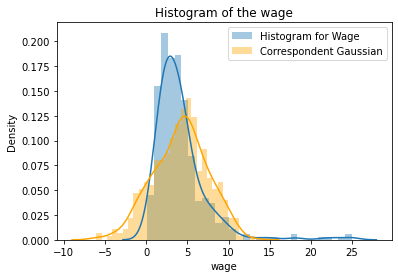

In [5]:
# First the histogram for wage
gaussian_wage = stats.norm.rvs(np.mean(data["wage"]), np.std(data["wage"]), size=428)
sns.distplot(data["wage"], label='Histogram for Wage', bins=30)
sns.distplot(gaussian_wage, label='Correspondent Gaussian', bins=30, color="orange")
plt.title("Histogram of the wage")
plt.legend()
plt.show()

/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


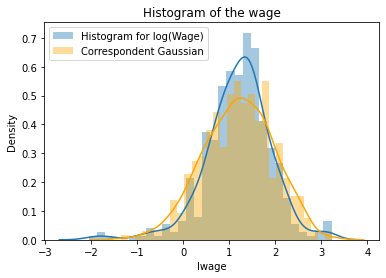

In [6]:
# Now the histogram for the log of wage
gaussian_wage = stats.norm.rvs(np.mean(data["lwage"]), np.std(data["lwage"]), size=428)
sns.distplot(data["lwage"], label='Histogram for log(Wage)', bins=30)
sns.distplot(gaussian_wage, label='Correspondent Gaussian', bins=30, color="orange")
plt.title("Histogram of the wage")
plt.legend()
plt.show()

It can be noted that the histogram of the log(wage) fits the gaussian distribution in a better way than the histogram of the wage.

### 4

In [7]:
# Let's use the Pandas corr function to obtain the desired correlation
data[["motheduc", "fatheduc"]].corr()

,motheduc,fatheduc
motheduc,1.000000,0.554063
fatheduc,0.554063,1.000000


Therefore, the correlation between the two variables is 0.554063, which is high. This can be understood as usually people marry in within their socioeconomic class, which, in general, achieves similar degree of education. A multicolinearity problem will rise if one uses both variables as explanatory variables for a predictive model.

### 5

/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


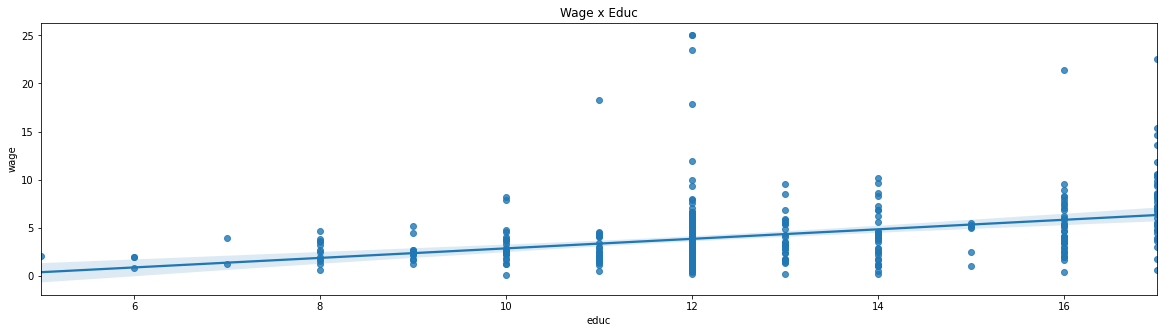

In [8]:
# First the wage and educ
plt.figure(figsize=(20, 5))
sns.regplot(data["educ"], data["wage"], fit_reg=True)
plt.title("Wage x Educ")
plt.show()

/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


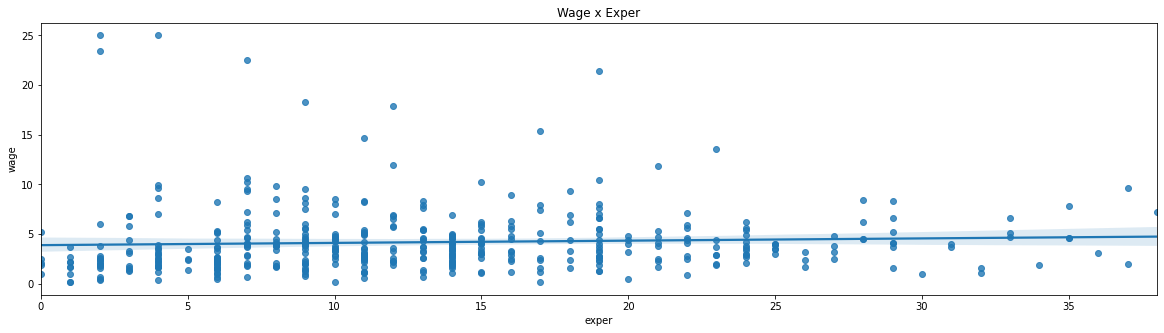

In [9]:
# Wage and exper
plt.figure(figsize=(20, 5))
sns.regplot(data["exper"], data["wage"], fit_reg=True)
plt.title("Wage x Exper")
plt.show()

/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


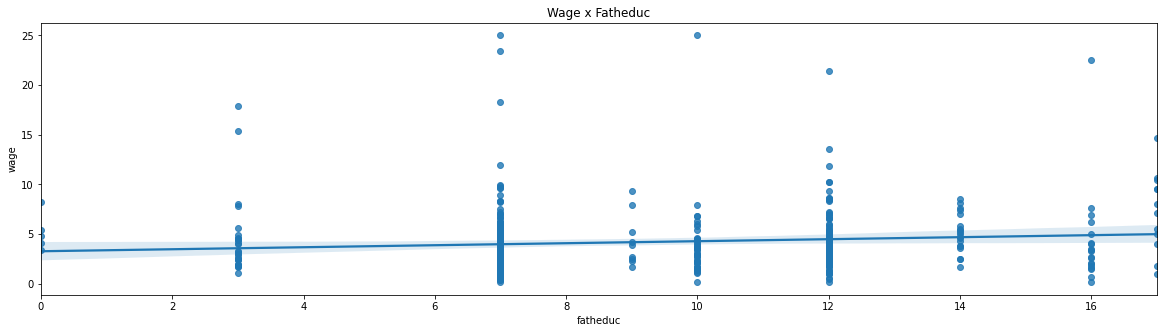

In [10]:
# Wage and fatheduc
plt.figure(figsize=(20, 5))
sns.regplot(data["fatheduc"], data["wage"], fit_reg=True)
plt.title("Wage x Fatheduc")
plt.show()

First plot indicates a clear relation between Wage and Education. In this case, the higher the number the years of education, the higher the wage tends to be.

In the second plot, the regression between the two variables show a very lightly inclined line, which would suggest a soft positive relation between wage and the number of years of experience.

For the last plot, there is also a small inclination, which would suggest that the higher the number of years of education a father has, the higher the wage of his daughter tends to be. The slope, however, like last plot, is very small.

This is not a case of the effect "toute chose étant égale par ailleurs" because we are not keeping the other variables constant when analysing the two plotted variables. For example, in the first plot, we are not considering the number of kids a certain individual, which can vary for each point.

### 6

The fundamental hipothesys for a unbiased estimator is that the non observed variable have a null mean and that the conditional mean of the non observed variable given the data is equal to the unconditional mean (which is null). In summary, we can write

$$E(u|x) = E(u) = 0$$

The "biais de variable omise", or omitted variable bias is circumstance in which relevant variables are left out of the regression model. For instance, these variables are independent from the others used and can carry great information about the overall data.

### 7

In [11]:
# Constructing the model
y = data["wage"]
s = np.shape(data["wage"])
const = np.ones(s)
city = data["city"]
educ = data["educ"]
exper = data["exper"]
nwifeinc = data["nwifeinc"]
kidslt6 = data["kidslt6"]
kidsgt6 = data["kidsgt6"]
X = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

# Calculating the coefficients
beta = np.linalg.inv(X.T @ X)@X.T@y

'''
Now, calculating the residuous, the variance-covariance matrix and
the standard deviation for each variable
'''
u=y-X@beta
n,k=np.shape(X)
sig2=u.T@u/(n-k)
var=sig2*np.linalg.inv(X.T @ X)
std=np.sqrt(np.diag(var))

# Printing the calculated variables

print("beta")
beta_print = pd.DataFrame(beta)
beta_print.columns = ['']*beta_print.shape[1]
print(beta_print.to_string(index=False))
print()

print("var")
var_print = pd.DataFrame(var)
var_print.columns = ['']*var_print.shape[1]
print(var_print.to_string(index=False))
print()

print("std")
std_print = pd.DataFrame(std)
std_print.columns = ['']*std_print.shape[1]
print(std_print.to_string(index=False))
print()

print("sigma^2")
print()
print(sig2)

beta
         
-2.403454
 0.369752
 0.460048
 0.023820
 0.015245
 0.036173
-0.061891

var
                                                                     
 0.928324 -0.024741 -0.056056 -0.007830 -0.000884  0.005245 -0.046005
-0.024741  0.106648 -0.001902 -0.000180 -0.001109 -0.001973  0.003081
-0.056056 -0.001902  0.004939 -0.000022 -0.000292 -0.004274  0.000873
-0.007830 -0.000180 -0.000022  0.000436  0.000054  0.001426  0.000972
-0.000884 -0.001109 -0.000292  0.000054  0.000240  0.000627 -0.000035
 0.005245 -0.001973 -0.004274  0.001426  0.000627  0.157588 -0.001792
-0.046005  0.003081  0.000873  0.000972 -0.000035 -0.001792  0.015721

std
         
 0.963496
 0.326570
 0.070275
 0.020880
 0.015499
 0.396974
 0.125384

sigma^2

9.700269739549361


/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


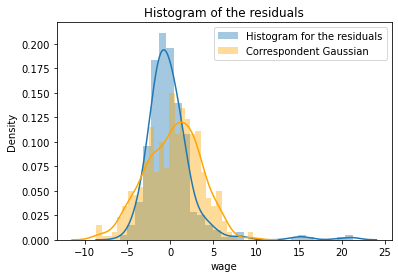

The mean of the residuals is
3.335234476967386e-14


In [12]:
gaussian_residuals = stats.norm.rvs(np.mean(u), np.std(u), size=428)
sns.distplot(u, label='Histogram for the residuals', bins=30)
sns.distplot(gaussian_residuals, label='Correspondent Gaussian', bins=30, color="orange")
plt.title("Histogram of the residuals")
plt.legend()
plt.show()

print("The mean of the residuals is")
print(u.mean())

The residuous have some components that make it not very well symmetric around 0. Also, that components make the variance to become considerably high.

### 8

In [13]:
# Now considering the log of the wage
y = data["lwage"]
s = np.shape(data["wage"])
const = np.ones(s)
city = data["city"]
educ = data["educ"]
exper = data["exper"]
nwifeinc = data["nwifeinc"]
kidslt6 = data["kidslt6"]
kidsgt6 = data["kidsgt6"]
X = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

# Calculating the coefficients
beta = np.linalg.inv(X.T @ X)@X.T@y

'''
Now, calculating the residuous, the variance-covariance matrix and
the standard deviation for each variable
'''
u=y-X@beta
n,k=np.shape(X)
sig2=u.T@u/(n-k)
var=sig2*np.linalg.inv(X.T @ X)
std=np.sqrt(np.diag(var))

# Printing the calculated variables

print("beta")
beta_print = pd.DataFrame(beta)
beta_print.columns = ['']*beta_print.shape[1]
print(beta_print.to_string(index=False))
print()

print("var")
var_print = pd.DataFrame(var)
var_print.columns = ['']*var_print.shape[1]
print(var_print.to_string(index=False))
print()

print("std")
std_print = pd.DataFrame(std)
std_print.columns = ['']*std_print.shape[1]
print(std_print.to_string(index=False))
print()

print("sigma^2")
print()
print(sig2)

beta
         
-0.398975
 0.035268
 0.102248
 0.015488
 0.004883
-0.045303
-0.011704

var
                                                                     
 0.042870 -0.001143 -0.002589 -0.000362 -0.000041  0.000242 -0.002124
-0.001143  0.004925 -0.000088 -0.000008 -0.000051 -0.000091  0.000142
-0.002589 -0.000088  0.000228 -0.000001 -0.000014 -0.000197  0.000040
-0.000362 -0.000008 -0.000001  0.000020  0.000003  0.000066  0.000045
-0.000041 -0.000051 -0.000014  0.000003  0.000011  0.000029 -0.000002
 0.000242 -0.000091 -0.000197  0.000066  0.000029  0.007277 -0.000083
-0.002124  0.000142  0.000040  0.000045 -0.000002 -0.000083  0.000726

std
         
 0.207050
 0.070178
 0.015102
 0.004487
 0.003331
 0.085308
 0.026944

sigma^2

0.44795719760721947


/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevinfkuhl/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


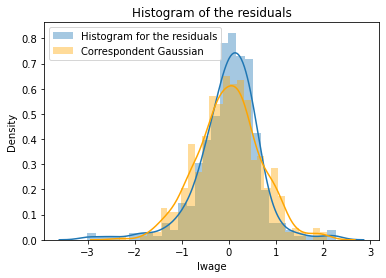

The mean of the residuals is
9.520940629869566e-15


In [14]:
gaussian_residuals = stats.norm.rvs(np.mean(u), np.std(u), size=428)
sns.distplot(u, label='Histogram for the residuals', bins=30)
sns.distplot(gaussian_residuals, label='Correspondent Gaussian', bins=30, color="orange")
plt.title("Histogram of the residuals")
plt.legend()
plt.show()

print("The mean of the residuals is")
print(u.mean())

The residuous are well distributed around zero. The variance of the residuous have significantly decreased. Also the mean of the residuous, compared to last case, is more close to zero.

### 9

In [15]:
model = sm.OLS(y,X)
results = model.fit()
'''
const
x1 -> city
x2 -> educ
x3 -> exper
x4 -> nwifeinc
x5 -> kidslt6
x6 -> kidsgt6
'''
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.00e-13
Time:                        14:22:37   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

Observing the above results, we can conlude the results of the hypothesis testing looking at the p-value (P>|t|). This is already the two-tailed test p-value. For the t-student test for variable nwifeinc, two-tailed test p-value is 0.143.

- For alpha = 1%, we consider that we must have a p-value < 0.01 to reject the null hypothesis (coefficient of nwifeinc is zero). We do not reject it.

- For alpha = 5%, we consider that we must have a p-value < 0.05 to reject the null hypothesis (coefficient of nwifeinc is zero). We do not reject it.

- For alpha = 10%, we consider that we must have a p-value < 0.10 to reject the null hypothesis (coefficient of nwifeinc is zero). We do not reject it.

Therefore, we can conclude that the variable nwifeinc is not significant with significance level of 1%.

### 10

In [16]:
# First, let's redo the calculations for the t-statistics
# Now, we are going to do it manually, instead of using the Statsmodels package
t_test_result = (beta-0.01)/std

# Displaying the results
print("T-test results")
print(t_test_result)
print()
print("In specific for the nwifeinc variable's coefficient")
print(t_test_result[4])
print()
print("T-test p-value for the nwifeinc variable's coefficient")
print(2*(1 - t.sf(t_test_result[4],n-k-1)))

T-test results
[-1.97524409  0.36005271  6.10838827  1.22305946 -1.53638899 -0.64827498
 -0.80549245]

In specific for the nwifeinc variable's coefficient
-1.5363889855562578

T-test p-value for the nwifeinc variable's coefficient
0.12519597367688684


Observing the above results, we can conlude the results of the hypothesis testing looking at the p-value (already considering a two-tailed test). For the t-student test for variable nwifeinc, two-tailed test p-value is 0.51712.

- For alpha = 5%, we consider that we must have a p-value < 0.05 to reject the null hypothesis (coefficient of nwifeinc is 0.01). We do not reject it.

Therefore, we can conclude that the coefficient of the variable nwifeinc is equal to 0.01 with significance level of 5%.

### 11

A important point to remember is that we cannot use individual student tests. We must use Fisher test to compare SSR between the unconstrained and constrained model.

In [17]:
# We can calculate the SSR0, which corresponds to the sum of squared residuals for the unconstrained model
u = results.resid
SSR0 = u.T@u
print("SSR0 is equal to: {}".format(SSR0))

# Let's rewrite the model (creating the constrained model)
X_c = np.column_stack((const,educ,exper,kidslt6,kidsgt6))
y_c = y - 0.01*nwifeinc - 0.05*city
model = sm.OLS(y_c, X_c)
results_c = model.fit()
u_c = results_c.resid
SSR1 = u_c.T@u_c

q = 2 # Number of constraints
n,k = X.shape
F = ((SSR1 - SSR0)/q)/(SSR0/(n-k))

pvalue = f.sf(F,q,n-k)

print("\nSSR1 is equal to: {}".format(SSR1))
print("The Fisher test result: {}".format(F))
print("The p-value: {}".format(pvalue))

SSR0 is equal to: 188.58998019263944

SSR1 is equal to: 189.78788085217226
The Fisher test result: 1.3370704454928417
The p-value: 0.2637267136252716


The Fisher statistic is calculated by

$$F = \frac{\frac{SSR_{constrained} - SSR_{unconstrained}}{q}}{\frac{SSR_{unconstrained}}{(n-k-1)}}$$

- For alpha = 5%, we consider that we must have a p-value < 0.05 to reject the null hypothesis (coefficient of nwifeinc is 0.01 and coefficient of city is 0.05). We do not reject it.

Therefore, we can conclude that the coefficient of the variable nwifeinc is equal to 0.01 and the coefficient of the variable city is equal to 0.05  with significance level of 5%.

### 12

Let's consider the regression of $log(wage)$ considering as explanatory variables the number of years of education and the number of years of experience.

In [18]:
y = data["lwage"]

s = np.shape(data["wage"])
const = np.ones(s)
educ = data["educ"]
exper = data["exper"]

X = np.column_stack((const,educ,exper))


model = sm.OLS(y, X) 
results = model.fit()

u = results.resid
parameters = results.params
'''
const
x1 -> educ
x2 -> exper
'''
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     37.02
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.51e-15
Time:                        14:22:37   Log-Likelihood:                -433.74
No. Observations:                 428   AIC:                             873.5
Df Residuals:                     425   BIC:                             885.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4002      0.190     -2.102      0.0

We can plot the regression (1 dependent variable and 2 explanatory variables) in a 3 dimensional plot, where the z-axis is represented by the dependent variable.

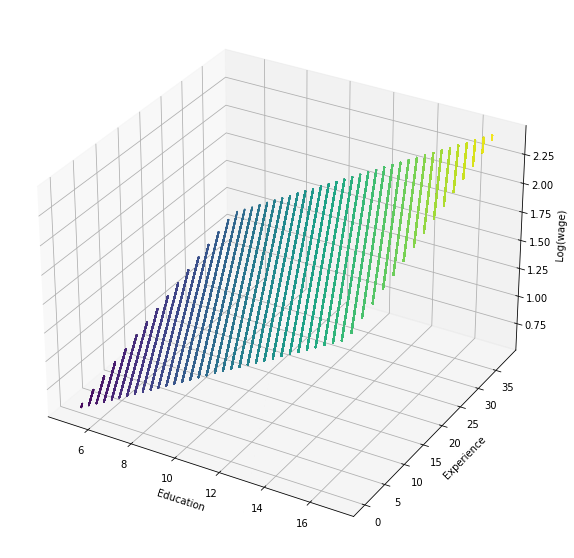

In [19]:
x1 = data["educ"]
x2 = data["exper"]

X1, X2 = np.meshgrid(x1, x2)
Z = parameters.x1*X1 + parameters.x2*X2

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 50, cmap='viridis')
ax.set_xlabel('Education')
ax.set_ylabel('Experience')
ax.set_zlabel('Log(wage)');

Also, it worths noting that as we are using the logarithm of the wage we can write that for a unit increase in educ it is expected a $100\cdot\beta_2$% change in the wage. For the exper, we can write that for a unit increase in exper it is expected a $100\cdot\beta_3$% change in the wage.

### 13

Initial model

$$y = log(wage) = c + \beta_1city + \beta_2educ + \beta_3exper + \beta_4nwifeinc + \beta_5kidslt6 + \beta_6kidsgt6$$

Defining $\theta = \beta_{6} - \beta_{5}$

We can write

$\theta +  \beta_{5} = \beta_{6}$

We get the model

$$log(wage) = c + \beta_1city + \beta_2educ + \beta_3exper + \beta_4nwifeinc + \beta_5kidslt6 + (\theta +  \beta_{5})kidsgt6$$

Which is, finally

$$log(wage) = c + \beta_1city + \beta_2educ + \beta_3exper + \beta_4nwifeinc + \beta_5(kidslt6 + kidsgt6) + \theta kidsgt6$$

Now, we test it for the significance of $\theta$, which is the same of testing H0:$\theta == 0$

In [20]:
# Reconstructing the model
y_2 = data["lwage"]
s=np.shape(data["wage"])

X_2=np.column_stack((const,city,educ,exper,nwifeinc,kidslt6 + kidsgt6, kidsgt6))

# Building Stats Model
model = sm.OLS(y_2,X_2)

'''
const
x1 -> city
x2 -> educ
x3 -> exper
x4 -> nwifeinc
x5 -> kidslt6 + kidsgt6
x6 -> kidsgt6 (theta)
'''

# Presenting the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.00e-13
Time:                        14:22:57   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

Observing the above results, we can conlude the result of the hypothesis testing looking at the p-value (P>|t|). This is already the two-tailed test p-value. The t-student test p-value for the coefficient $\theta$ is 0.710.

- For alpha = 5%, we consider that we must have a p-value < 0.05 to reject the null hypothesis. We do not reject it.

Therefore, we can conclude that $\theta = 0$ with significance level of 5%. This means that the coefficients associated to kidsgt6 and kidstlt6 are equal, with significance level of 5%.

Intepreting this, we get that the effect of children in the wage of female is the same, disregarding the fact the children are young (less than 6 years) or old (6 < age < 18).

### 14

In this case we make H0: The data has homoscedasticity.

H1: The data has heteroscedasticity.

We propose the test that suppose a linear relation between the error term (residuals) and the used variables.

So, we suppose

$$u^2 = \delta_0 + \delta_1x_1 + ... \delta_kx_k + v$$

We test, therefore

$$H0: \delta_1 = \delta_2 = ... = \delta_k = 0$$

In [21]:
# Rewriting the model from question 7
y = data["lwage"]
s = np.shape(data["wage"])
const = np.ones(s)
city = data["city"]
educ = data["educ"]
exper = data["exper"]
nwifeinc = data["nwifeinc"]
kidslt6 = data["kidslt6"]
kidsgt6 = data["kidsgt6"]
X = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))


model = sm.OLS(y,X)
results = model.fit()

u = results.resid
u2 = u**2
y = u2
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.009
Date:                Sun, 22 Nov 2020   Prob (F-statistic):             0.0633
Time:                        14:22:57   Log-Likelihood:                -622.39
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     421   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519      0.323      1.398      0.1

As explained in the project's instructions, all tests must be done considering a 5\% significance level. We obtained a p-value of 0.148 for the Linearity test for heterocedascity.

Therefore, within the required significance, we cannot reject $H0$, meaning that we can not conclude that there is heterocedascity in the data (considering the model of question 7).

### 15

To test the change of structure on the regression made on question 8, we propose the use of the Chow test.

The test statistic is calculated as follow (for two groups)

$$F_{Chow} = \frac{SSR_0 - (SSR_1 + SSR_2)}{SSR_1 + SSR_2} \times \frac{n_1 + n_2 - 2k}{k}$$

With n being the number of observations in a given group, and k is the number of parameters we are estimating.

- First, with the following groups
    - Entire set
    - Women with more than 43 years old
    - Women with less than 43 years old

For the first group

In [24]:
y = data["lwage"]
s = np.shape(data["wage"])
const = np.ones(s)
city = data["city"]
educ = data["educ"]
exper = data["exper"]
nwifeinc = data["nwifeinc"]
kidslt6 = data["kidslt6"]
kidsgt6 = data["kidsgt6"]
X = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

n,k = X.shape

model = sm.OLS(y, X) 
results = model.fit()

u = results.resid
SSR0 = u.T @ u

For the second group

In [25]:
data1 = data[data['age'] >= 43]

y1 = data1["lwage"]

s = np.shape(data1["wage"])
const = np.ones(s)
city = data1["city"]
educ = data1["educ"]
exper = data1["exper"]
nwifeinc = data1["nwifeinc"]
kidslt6 = data1["kidslt6"]
kidsgt6 = data1["kidsgt6"]

X1 = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

n1 = X1.shape[0]

model = sm.OLS(y1, X1) 
results = model.fit()

u = results.resid
SSR1 = u.T @ u

Finally, for the third group

In [26]:
data2 = data[data['age'] < 43]

y2 = data2["lwage"]

s = np.shape(data2["wage"])
const = np.ones(s)
city = data2["city"]
educ = data2["educ"]
exper = data2["exper"]
nwifeinc = data2["nwifeinc"]
kidslt6 = data2["kidslt6"]
kidsgt6 = data2["kidsgt6"]

X2 = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

n2 = X2.shape[0]

model = sm.OLS(y2, X2) 
results = model.fit()

u = results.resid
SSR2 = u.T @ u

In [27]:
F = ((SSR0 - (SSR1 + SSR2)) / (SSR1 + SSR2)) * ((n1 + n2 - 2*k) / k)

p_value = f.sf(F, X.shape[0] - X.shape[1] - (X1.shape[0] - X1.shape[1] + X2.shape[0] - X2.shape[1]), n-2*k)

print("SSR0: {}".format(SSR0))
print("SSR1: {}".format(SSR1))
print("SSR2: {}".format(SSR2))
print("n: {}".format(n))
print("n1: {}".format(n1))
print("n2: {}".format(n2))
print("k: {}".format(k))
print()
print('Chow Test p-value: {}'.format(p_value))
print('Fisher: {}'.format(F))


SSR0: 188.58998019263944
SSR1: 80.40365115321053
SSR2: 104.48165074506036
n: 428
n1: 211
n2: 217
k: 7

Chow Test p-value: 0.3099734135726031
Fisher: 1.1850874941083283


For the second part we have more groups

- Entire set
- Women with less than 30 years old (<)
- Women with more than 30 years old and less than 43 years old(>= and <)
- Women with more than 43 years old (>=)


In [28]:
# Second group
data1 = data[data['age'] <= 30]

y1 = data1["lwage"]

s = np.shape(data1["wage"])
const = np.ones(s)
city = data1["city"]
educ = data1["educ"]
exper = data1["exper"]
nwifeinc = data1["nwifeinc"]
kidslt6 = data1["kidslt6"]
kidsgt6 = data1["kidsgt6"]

X1 = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

n1 = X1.shape[0]

model = sm.OLS(y1, X1) 
results = model.fit()

u = results.resid
SSR1 = u.T @ u

In [29]:
# Third group
data2 = data[data['age'] > 30]
data2 = data2[data2["age"] < 43]

y2 = data2["lwage"]

s = np.shape(data2["wage"])
const = np.ones(s)
city = data2["city"]
educ = data2["educ"]
exper = data2["exper"]
nwifeinc = data2["nwifeinc"]
kidslt6 = data2["kidslt6"]
kidsgt6 = data2["kidsgt6"]

X2 = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

n2 = X2.shape[0]

model = sm.OLS(y2, X2) 
results = model.fit()

u = results.resid
SSR2 = u.T @ u

In [30]:
# Fourth group
data3 = data[data["age"] >= 43]

y3 = data3["lwage"]

s = np.shape(data3["wage"])
const = np.ones(s)
city = data3["city"]
educ = data3["educ"]
exper = data3["exper"]
nwifeinc = data3["nwifeinc"]
kidslt6 = data3["kidslt6"]
kidsgt6 = data3["kidsgt6"]

X3 = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

n3 = X3.shape[0]

model = sm.OLS(y3, X3) 
results = model.fit()

u = results.resid
SSR3 = u.T @ u

In [31]:
F = ((SSR0 - (SSR1 + SSR2 + SSR3)) / (SSR1 + SSR2 + SSR3)) * ((n1 + n2 + n3 - 2*k) / k)

p_value = f.sf(F, X.shape[0] - X.shape[1] - (X1.shape[0] - X1.shape[1] + X2.shape[0] - X2.shape[1] + X3.shape[0] - X3.shape[1]), n-2*k)

print("SSR0: {}".format(SSR0))
print("SSR1: {}".format(SSR1))
print("SSR2: {}".format(SSR2))
print("SSR3: {}".format(SSR3))
print("n: {}".format(n))
print("n1: {}".format(n1))
print("n2: {}".format(n2))
print("n3: {}".format(n3))
print("k: {}".format(k))
print()
print('Chow Test p-value: {}'.format(p_value))
print('Fisher: {}'.format(F))

SSR0: 188.58998019263944
SSR1: 3.387215073161979
SSR2: 100.03565630367271
SSR3: 80.40365115321053
n: 428
n1: 19
n2: 198
n3: 211
k: 7

Chow Test p-value: 0.0961451078434979
Fisher: 1.5325563045387653


### 16

In order to do the regression we write the variables

more43: 1 if woman's age is >= 43

between3043: 1 if woman's age is >30 but <43

less30: 1 if woman's age is <= 30

We cannot add those three variables to the model as

$$more43 + between3043 + less30 = 1$$

Therefore, using as the base case the women that have less than 30 years old (<=) we build the regression adding more43 and between3043.

In [32]:
data_bin = data.copy()

data_bin["more43"] = 0
data_bin["between3043"] = 0
data_bin["less30"] = 0

data_bin.loc[data_bin["age"] >= 43 , 'more43'] = 1
data_bin.loc[(data_bin["age"] > 30) & (data_bin["age"] < 43) , 'between3043'] = 1
data_bin.loc[data_bin["age"] <= 30 , 'less30'] = 1

y = data_bin["lwage"]
s = np.shape(data["wage"])
const = np.ones(s)
city = data_bin["city"]
educ = data_bin["educ"]
exper = data_bin["exper"]
nwifeinc = data_bin["nwifeinc"]
kidslt6 = data_bin["kidslt6"]
kidsgt6 = data_bin["kidsgt6"]
more43 = data_bin["more43"]
between3043 = data_bin["between3043"]

X = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6, more43, between3043))

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

u = results.resid
SSR0 = u.T @ u

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     10.07
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           7.08e-13
Time:                        14:22:57   Log-Likelihood:                -430.46
No. Observations:                 428   AIC:                             878.9
Df Residuals:                     419   BIC:                             915.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2210      0.248     -0.893      0.3

In [33]:
y = data_bin["lwage"]
s = np.shape(data["wage"])
const = np.ones(s)
city = data_bin["city"]
educ = data_bin["educ"]
exper = data_bin["exper"]
nwifeinc = data_bin["nwifeinc"]
kidslt6 = data_bin["kidslt6"]
kidsgt6 = data_bin["kidsgt6"]
more43 = data_bin["more43"]
between3043 = data_bin["between3043"]

X = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))

model = sm.OLS(y,X)
results = model.fit()

u = results.resid
SSR1 = u.T @ u

n,k = X.shape

q = 2

F = ((SSR1 - SSR0)/q)/(SSR0/(n-k))

pvalue = f.sf(F,q,n-k)

print("Value of q: {}".format(q))
print("n: {} / k: {}".format(n,k))
print("SSR0 is equal to: {}".format(SSR0))
print("SSR1 is equal to: {}".format(SSR1))
print("The Fisher test result: {}".format(F))
print("The p-value: {}".format(pvalue))

Value of q: 2
n: 428 / k: 7
SSR0 is equal to: 187.30681260001555
SSR1 is equal to: 188.58998019263944
The Fisher test result: 1.442055280840906
The p-value: 0.23760676040907033


The p-value is 0.2376. Therefore, we do not reject the null hypothesis with test significance level of 5%. Therefore, both variables are not significant.